In [1]:
import os

In [2]:
import pandas as pd

In [3]:
os.chdir("data")

In [4]:
def get_results(min_koef, max_koef):
    home_favourite = {}
    away_favourite = {}
    for dir in os.listdir():
        os.chdir(dir)
        home_favourite[dir] = {"H" : 0, "D" : 0, "A": 0}
        away_favourite[dir] = {"H" : 0, "D" : 0, "A": 0}
        for file in os.listdir():
            data = pd.read_csv(file)
            data = data[["HomeTeam", "AwayTeam", "FTR", "B365H", "B365A"]]
            for index, row in data.iterrows():
                k1 = row["B365H"]
                k2 = row["B365A"]
                if abs(k1 - k2) >= min_koef and abs(k1-k2)<=max_koef:
                    if k1 < k2:
                        home_favourite[dir][row["FTR"]] += 1
                    else:
                        away_favourite[dir][row["FTR"]] += 1
        os.chdir("..")
    return [home_favourite, away_favourite]

In [72]:
data = {}

for i in range(0, 51, 5):
    min_koef = i/10
    max_koef= i/10 + 0.5
    data[min_koef] = get_results(min_koef, max_koef)
    print(i, end="\r")

In [73]:
data.keys()

dict_keys([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])

In [74]:
def sumzip(*items):
    return [sum(values) for values in zip(*items)]

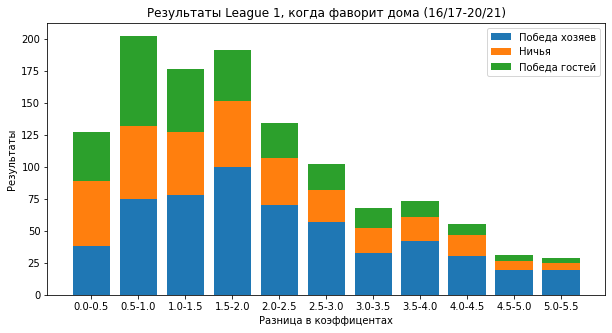

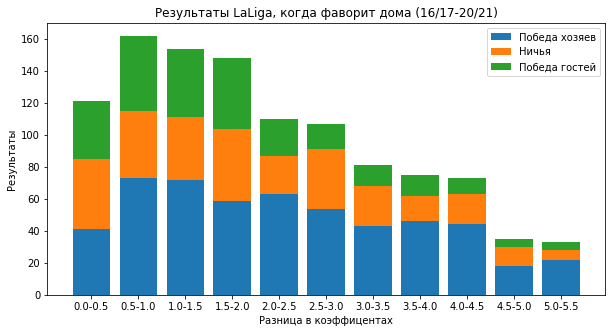

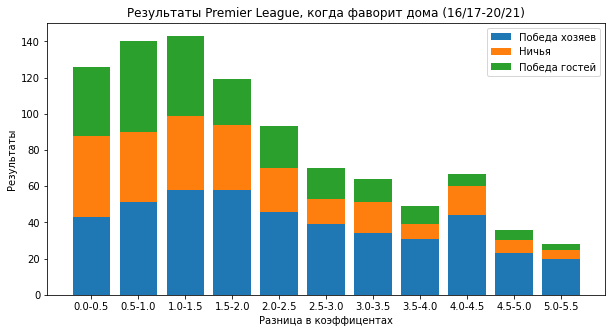

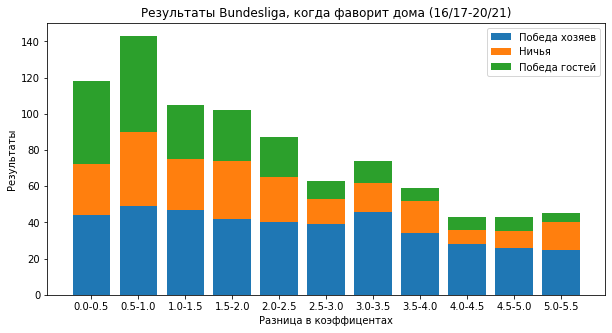

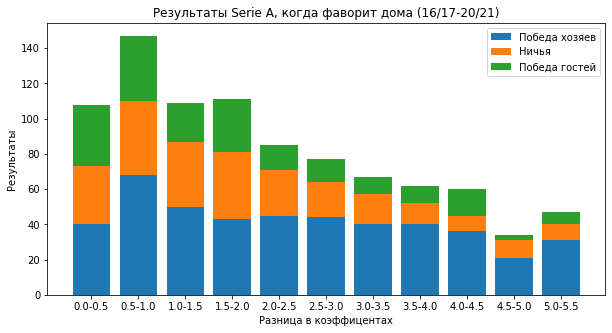

In [82]:
import matplotlib.pyplot as plt
import numpy as np
leagues = ["F1", "SP1", "E0", "D1", "I1"]
leagues_dict = {"F1": "League 1", "SP1": "LaLiga", "E0": "Premier League", "D1": "Bundesliga", "I1": "Serie A"}
for league in leagues:
    ind = np.arange(11)
    fig, ax = plt.subplots(figsize=(10, 5))

    home = [value[0][league]["H"] for value in data.values()]
    draw = [value[0][league]["D"] for value in data.values()]
    away = [value[0][league]["A"] for value in data.values()]
    
    p1 = ax.bar(ind, home, label='Победа хозяев')
    p2 = ax.bar(ind, draw,
            bottom=home,label='Ничья')
    p3 = ax.bar(ind, away,
            bottom=sumzip(home,draw),label='Победа гостей')
    plt.ylabel('Результаты')
    plt.xlabel("Разница в коэффицентах")
    plt.title("Результаты {}, когда фаворит дома (16/17-20/21)".format(leagues_dict[league]))
    plt.legend()
    plt.xticks(ind, ["{}-{}".format(i/10, i/10+0.5) for i in range(0, 51, 5)])

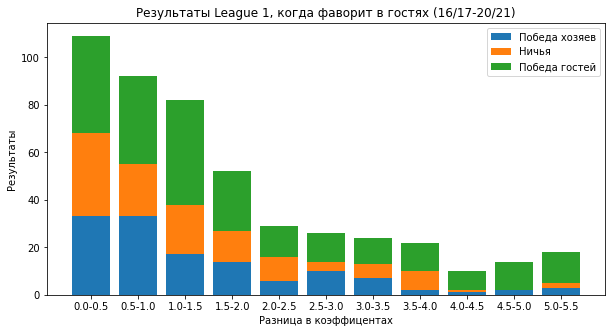

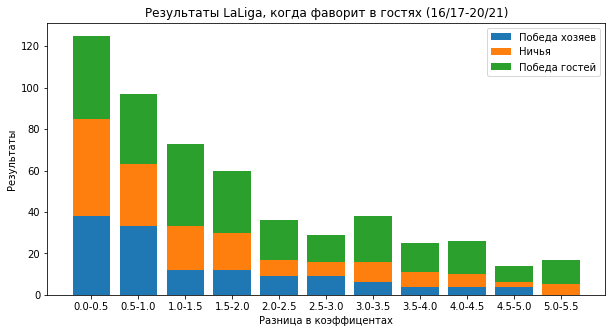

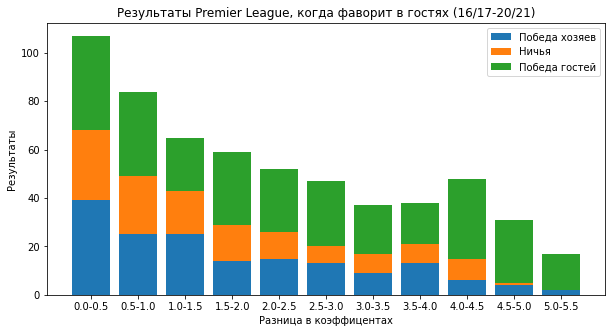

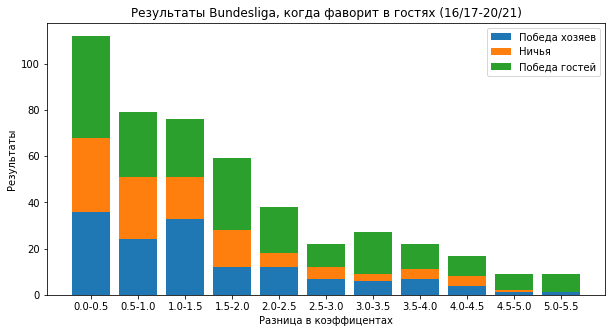

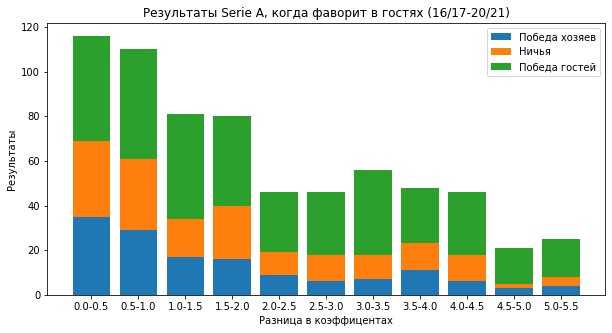

In [83]:
import matplotlib.pyplot as plt
import numpy as np
leagues = ["F1", "SP1", "E0", "D1", "I1"]
leagues_dict = {"F1": "League 1", "SP1": "LaLiga", "E0": "Premier League", "D1": "Bundesliga", "I1": "Serie A"}
for league in leagues:
    ind = np.arange(11)
    fig, ax = plt.subplots(figsize=(10, 5))

    home = [value[1][league]["H"] for value in data.values()]
    draw = [value[1][league]["D"] for value in data.values()]
    away = [value[1][league]["A"] for value in data.values()]
    
    p1 = ax.bar(ind, home, label='Победа хозяев')
    p2 = ax.bar(ind, draw,
            bottom=home,label='Ничья')
    p3 = ax.bar(ind, away,
            bottom=sumzip(home,draw),label='Победа гостей')
    plt.ylabel('Результаты')
    plt.xlabel("Разница в коэффицентах")
    plt.title("Результаты {}, когда фаворит в гостях (16/17-20/21)".format(leagues_dict[league]))
    plt.legend()
    plt.xticks(ind, ["{}-{}".format(i/10, i/10+0.5) for i in range(0, 51, 5)])

In [23]:
# print("H: победа хозяев, D: ничья, A: победа гостей")
# print("Минимаьная разница коэфициентов:", min_koef)
# print("Максимальная разница коэфицентов:", max_koef)
# print()
# print("Результаты, когда фаворит дома")
# for key, arg in home_favourite.items():
#     print(key, arg)
# #print("В процентном соотношении", home_favourite_pr)
# print()
# print("Результаты, когда фаворит в гостях")
# for key, arg in away_favourite.items():
#     print(key, arg)
# #print("В процентном соотношении", away_favourite_pr)

H: победа хозяев, D: ничья, A: победа гостей
Минимаьная разница коэфициентов: 1.0
Максимальная разница коэфицентов: 1.4

Результаты, когда фаворит дома
F1 {'H': 64, 'D': 39, 'A': 36}
SP1 {'H': 64, 'D': 33, 'A': 35}
E0 {'H': 45, 'D': 36, 'A': 38}
D1 {'H': 37, 'D': 24, 'A': 25}
I1 {'H': 41, 'D': 28, 'A': 19}

Результаты, когда фаворит в гостях
F1 {'H': 14, 'D': 18, 'A': 36}
SP1 {'H': 9, 'D': 17, 'A': 29}
E0 {'H': 18, 'D': 16, 'A': 16}
D1 {'H': 28, 'D': 16, 'A': 18}
I1 {'H': 12, 'D': 13, 'A': 35}
